## Question 0 Salary

In [2]:
import pandas as pd # conventional alias

salary = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/salary_uk.csv")

In [43]:
import numpy as np
import pandas as pd
from matplotlib import cm
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

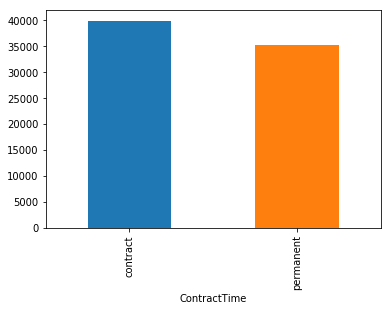

In [5]:
salary.groupby('ContractTime').SalaryNormalized.mean().plot(kind='bar')

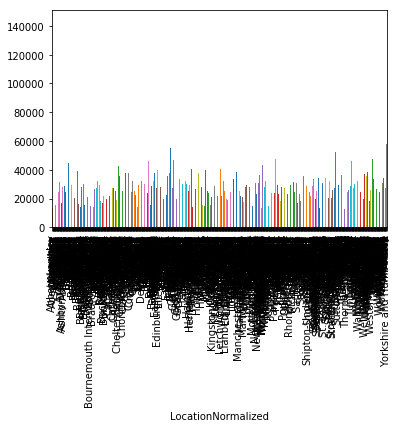

In [6]:
salary.groupby('LocationNormalized').SalaryNormalized.mean().plot(kind='bar')

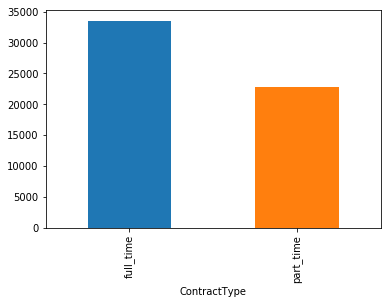

In [7]:
salary.groupby('ContractType').SalaryNormalized.mean().plot(kind='bar')

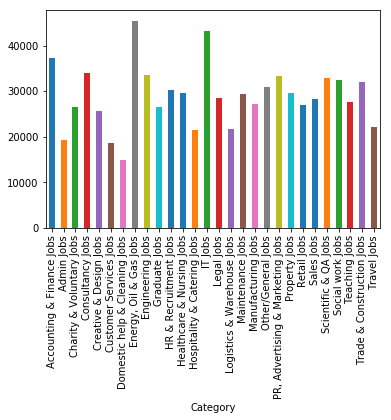

In [8]:
salary.groupby('Category').SalaryNormalized.mean().plot(kind='bar')

As we can see with some basic EDA there are some clear differences in the mean salary between the variables. Full-time workers seem to make more money compared to part-time. When broken down into categories the jobs that require more education make more money than those that dont, such as domestic help and charity and voluntary jobs. We can also see there are some clear differences between locations and their mean salary. 

Next, we want to do some preprocessing of the data to remove the raw columns that have been normalized. We also want to use some of the key words in the full desciprition column to help us with our predictive model

In [10]:
salary.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


In [11]:
salary_new = salary.drop([u'LocationRaw', u'SalaryRaw', u'SourceName'],axis =1)

In [12]:
salary_new.head()

,Id,Title,FullDescription,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryNormalized
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,25000
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,30000
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,30000
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,27500
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000


In [15]:
vec = TfidfVectorizer()
X = vec.fit_transform(salary_new['Title'].values.astype('str'))
Title = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

In [17]:
X = vec.fit_transform(salary_new['FullDescription'].values.astype('str'))
FullDescription = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

In [18]:
salary_new = pd.merge(salary_new, Title, left_index=True, right_index=True)
salary_new =pd.merge(salary_new, FullDescription, left_index=True, right_index=True)

In [19]:
salary_new.head()

,Id,Title,FullDescription,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryNormalized,10_x,...,zoning,zoom,zoos,zselbyjenningsaptrackcouk,zu,zuken,zuknftiger,zum,zurich,zuschuss
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,25000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,30000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,30000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,27500,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
salary_new = salary_new.drop(['Title','FullDescription'], axis = 1)

In [24]:
salary_new = pd.get_dummies(salary_new, columns =[u'LocationNormalized',
       u'ContractType', u'ContractTime', u'Company', u'Category'])

In [25]:
salary_new.head()

,Id,SalaryNormalized,10_x,100_x,1000_x,11_x,11501250,12_x,140_x,15_x,...,Category_Other/General Jobs,"Category_PR, Advertising & Marketing Jobs",Category_Property Jobs,Category_Retail Jobs,Category_Sales Jobs,Category_Scientific & QA Jobs,Category_Social work Jobs,Category_Teaching Jobs,Category_Trade & Construction Jobs,Category_Travel Jobs
0,12612628,25000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,12612830,30000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,12612844,30000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,12613049,27500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,12613647,25000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


Now that we have preprocessed the data set we can build our predictive models!

In [28]:
salary_Y = salary_new['SalaryNormalized']
salary_X = salary_new.drop('SalaryNormalized', axis=1)

Xtrain, Xtest, ytrain, ytest = train_test_split(salary_X, salary_Y,
                                                random_state=9)
Xcolnames = list(salary_X)

## Linear Regression

In [38]:
lr = LinearRegression()

lr.fit(Xtrain, ytrain)
y_pred_lr = lr.predict(Xtest)

In [42]:
print("Training set score: {:.2f}".format(lr.score(Xtrain, ytrain)))
print("Test set score: {:.2f}".format(lr.score(Xtest, ytest)))

Training set score: 1.00
Test set score: 0.34


## K Nearest Neighbor

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10, p=2, metric='minkowski')
knn.fit(Xtrain, ytrain)
y_pred_KNN = knn.predict(Xtest)

## Decsion Tree

In [35]:
clf = DecisionTreeClassifier(random_state=1)
clf.fit(Xtrain, ytrain)
y_pred_Tree = clf.predict(Xtest)

## Random Forest

In [44]:
clf_RM = RandomForestClassifier(n_estimators = 100, criterion='entropy', random_state=0)
clf_RM.fit(Xtrain, ytrain)
y_test_pred = clf_RM.predict(Xtest)

## Ridge Regression

In [54]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(Xtrain, ytrain)

print("Training set score: {:.2f}".format(ridge.score(Xtrain, ytrain)))
print("Test set score: {:.2f}".format(ridge.score(Xtest, ytest)))

C:\Users\Dean\Anaconda2\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Training set score: 0.27
Test set score: 0.26


In [56]:
y_pred_ridge = ridge.predict(Xtest)

In [55]:
print('       Accuracy of Models       ')
print('--------------------------------')
print('Linear Regression       '+"{:.2f}".format(lr.score(Xtest, ytest)*100)+'%')
print('KNN                     '+"{:.2f}".format(accuracy_score(ytest, y_pred_KNN)*100)+'%')
print('Desicion Tree           '+"{:.2f}".format(accuracy_score(ytest, y_pred_Tree)*100)+'%')
print("Random forest           "+"{:.2f}".format(accuracy_score(ytest, y_test_pred)*100)+'%')
print('Ridge Regression        '+"{:.2f}".format(ridge.score(Xtest, ytest)*100)+'%')

       Accuracy of Models       
--------------------------------
Linear Regression       34.42%
KNN                     6.04%
Desicion Tree           14.76%
Random forest           19.48%
Ridge Regression        25.89%


The best model is Linear regression, while the worst model is knearest neighbor. Comparing these models to predicting if salary is above or below $50K it would appear they are not nearly as accurate. 